In [41]:
import numpy as np
import pandas as pd
import warnings

In [68]:
warnings.filterwarnings('ignore')

In [42]:
df_columns = ['user_id','item_id','rating','timestamp']
df = pd.read_csv("u.data",sep='\t',names=df_columns)


In [43]:
print(df.shape)
print(df['user_id'].nunique())
print(df['item_id'].nunique())

(100000, 4)
943
1682


In [44]:
movies_titles = pd.read_csv("u.item",sep="|",header = None)
#movies_titles

In [45]:
movies_titles = movies_titles.loc[:,:1]
movies_titles.columns = ['item_id','titles']

In [46]:
movies_titles.head()

,item_id,titles
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [47]:
df = pd.merge(df,movies_titles,on='item_id')

In [48]:
df.tail()

,user_id,item_id,rating,timestamp,titles
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [50]:
df.groupby('titles').mean()['rating'].sort_values(ascending=False).head()

titles
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [51]:
df.groupby('titles').count()['rating'].sort_values(ascending=True).head()

titles
� k�ldum klaka (Cold Fever) (1994)            1
Mille bolle blu (1993)                        1
Mat' i syn (1997)                             1
Marlene Dietrich: Shadow and Light (1996)     1
Man from Down Under, The (1943)               1
Name: rating, dtype: int64

In [52]:
ratings = pd.DataFrame(df.groupby('titles').mean()['rating'])
ratings.head()

,rating
titles,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [53]:
ratings['No. of ratings'] = pd.DataFrame(df.groupby('titles').count()['rating'])

In [54]:
ratings.sort_values(by='No. of ratings',ascending=False)

,rating,No. of ratings
titles,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


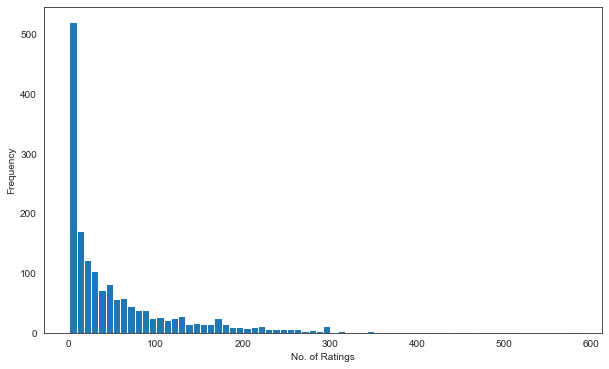

In [55]:
plt.figure(figsize=(10,6))
plt.xlabel('No. of Ratings')
plt.ylabel('Frequency')
plt.hist(ratings['No. of ratings'],bins = 70)
plt.show()

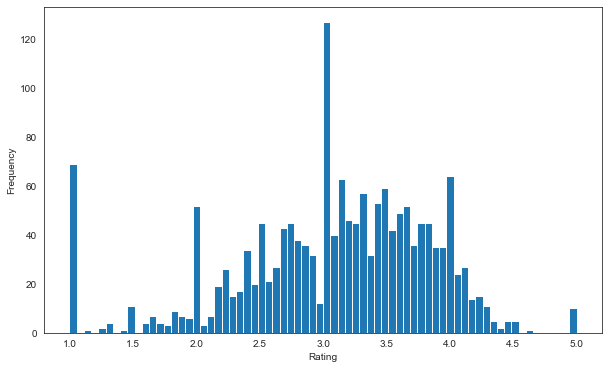

In [56]:
plt.figure(figsize=(10,6))
plt.hist(ratings['rating'],bins = 70)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

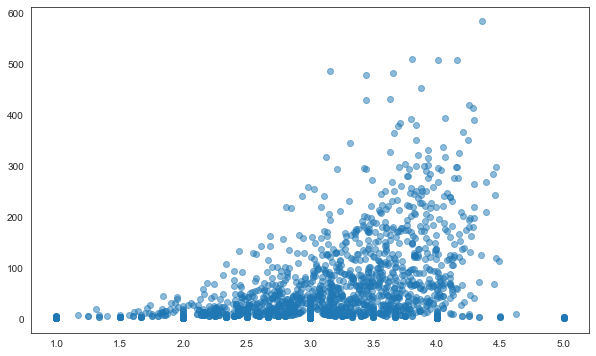

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(ratings['rating'],ratings['No. of ratings'],alpha=0.5)
plt.show()

#sns.jointplot(x='rating',y='No. of ratings',data = ratings,alpha=0.5)  #Can also be used to do the same

In [58]:
df.head()

,user_id,item_id,rating,timestamp,titles
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [59]:
moviemat = df.pivot_table(index='user_id',columns='titles',values = 'rating')

In [60]:
moviemat.head()

titles,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [61]:
starwars_user_ratings = moviemat['Star Wars (1977)']

In [69]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
#type(similar_to_starwars)
similar_to_starwars.head()

titles
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [70]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])        #Created a dataframe
corr_starwars.dropna(inplace = True)                                       #To remove NAn values


corr_starwars.sort_values("Correlation",ascending = False)


,Correlation
titles,
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [71]:
corr_starwars = corr_starwars.join(ratings['No. of ratings'])


In [72]:
corr_starwars

,Correlation,No. of ratings
titles,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


## We need to discard those value which have low number of ratings
### Discarding movies with ratings < 100

In [76]:
corr_starwars[corr_starwars['No. of ratings'] > 100].sort_values("Correlation",ascending = False)

,Correlation,No. of ratings
titles,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


## Predict Function

In [78]:
def predict_movies(movie_name):
    movie_user_ratings = moviemat[movie_name]
    similar_to_movie = moviemat.corrwith(movie_user_ratings)
    
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])        #Created a dataframe
    corr_movie.dropna(inplace = True)                                       #To remove NAn values
    
    corr_movie = corr_movie.join(ratings['No. of ratings'])
    predictions = corr_movie[corr_movie['No. of ratings'] > 100].sort_values("Correlation",ascending = False)
    
    return predictions

In [85]:
predict = predict_movies("Titanic (1997)")
predict.head(n = 10)

,Correlation,No. of ratings
titles,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
William Shakespeare's Romeo and Juliet (1996),0.430243,106
"Last of the Mohicans, The (1992)",0.427239,128
Outbreak (1995),0.426237,104
Die Hard (1988),0.403124,243
